In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.2 MB 4.2 MB/s eta 0:01:33
   ---------------------------------------- 0.8/390.2 MB 2.8 MB/s eta 0:02:19
   ---------------------------------------- 1.3/390.2 MB 2.1 MB/s eta 0:03:06
   ---------------------------------------- 1.6/390.2 MB 1.9 MB/s eta 0:03:29
   ---------------------------------------- 1.8/390.2 MB 1.8 MB/s eta 0:03:40
   ---------------------------------------- 2.1/390.2 MB 1.8 MB/s eta 0:03:42
   ---------------------------------------- 2.4/390.2 MB 1.6 MB/s eta 0:03:57
   ---------------------------------------- 2.6/390.2 MB 1.6 MB/s eta 0:04:07
   ---------------------------------------- 2.9/390.2 MB 1.5 MB/s eta 0:04:26
   ---------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/50


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: nan - val_loss: nan
Epoch 2/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 3/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: nan - val_loss: nan
Epoch 4/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 5/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 6/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: nan - val_loss: nan
Epoch 7/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 8/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: nan - val_loss: nan
Epoch 9/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: nan - val_loss: nan
Epoch 10/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 11/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: nan - val_loss: nan
Epoch 12/50
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: nan - val_loss: nan
Epoch 13/50

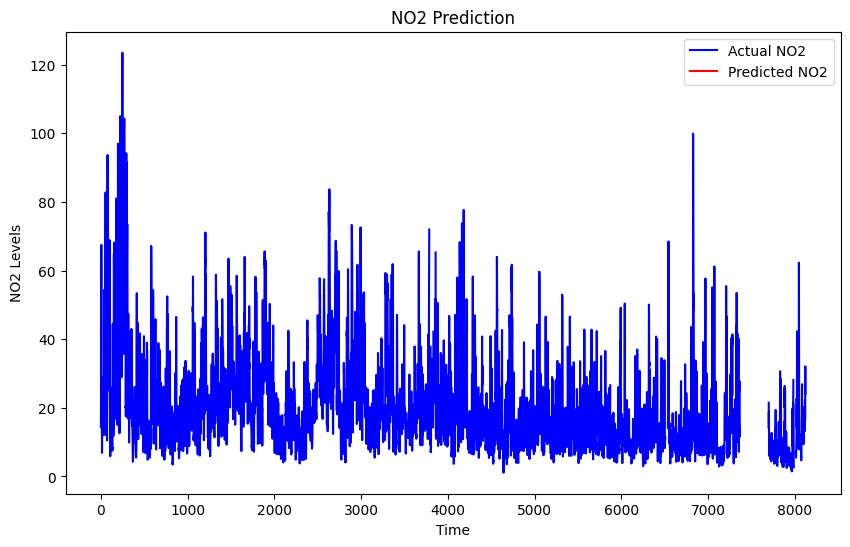

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("../data/train.csv")

# Set 'id' as the date index
df['id'] = pd.to_datetime(df['id'])
df.set_index('id', inplace=True)

# Select column to predict
data = df[['valeur_NO2']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, window_size=30):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Split data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual NO2')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted NO2')
plt.title('NO2 Prediction')
plt.xlabel('Time')
plt.ylabel('NO2 Levels')
plt.legend()
plt.show()


In [9]:
y_pred = model.predict(X_test)

display(y_test)
display(y_pred)

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[14.4],
       [17.7],
       [25.5],
       ...,
       [ nan],
       [ nan],
       [ nan]])

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [5]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

ValueError: Input contains NaN.